# Notes K-matrix

- $K_{ij} \iff$ energy flow from state $j$ to state $i$

## parallel (DAS)
Energy leaves system directly

Full matrix $\iff$ Reduced maxtrix: 

- $K_{ij} = 0 ~ \forall i \neq j$

## sequntial (EAS)
Energy flows from one compartment $i$ to the next $i+1$ until it leaves the system ($K_{nn}$)

Assume $\mathbf{K}$ is $n \times n$ and sequence is in order

Full matrix:

- $K_{i+1i} = -K_{ii} ~ \forall i < n \land K_{nn} \neq 0$

Reduced matrix:

- $K^{Reduced}_{i+1i} = K^{Full}_{i+1i} \land K_{ii} = 0 ~ \forall i < n \land K_{nn} \neq 0$

## General
Full matrix:

- $K_{ii} \iff -$ sum flows out of the compartment $i$ (to other compartments or out of the system)
- $K_{ij} ~ \forall i \neq j ~ \iff$ flow from compartment $j$ to comparment $i$

Reduced matrix:

- $\left(\sum _{k\neq i}^n K_{ki}\right)- K^{Full}_{ii} \iff$ flow of the compartment $i$ out of the system
- $K^{Reduced}_{ij} = K^{Full}_{ij} ~ \forall i \neq j ~\iff$ flow from compartment $j$ to comparment $i$

# cyano-PS1 case study

As in the lecture note we first try a global analysis

## Global analysis

Assumpotion the process can ne described by a simple sequential model.

### K-matrix sequential

The full K-matrix for a 4 compartment sequential scheme has the form of $\mathbf{K}^{Full}$

$$
\mathbf{K}^{Full} = \begin{bmatrix} 
    -k_{21} &         &        &           \\ 
    k_{21}  & -k_{32} &        &           \\
            & k_{32}  & -k_{43} &          \\
            &         & k_{43} & k_{4 Out} \\
    \end{bmatrix}
$$

Since both glotaran and pyglotaran use a reduced form of the K-matrix, it need to be transformed

$$
\mathbf{K}^{Reduced} = \begin{bmatrix} 
           &         &        &           \\ 
    k_{21} &         &        &           \\
           &  k_{32} &        &           \\
           &         & k_{43} & k_{4 Out} \\
    \end{bmatrix}
$$


### Notebook helper function for pretty output

In [1]:
from IPython.display import Markdown, display


def print_md(markdown_printable):
    """Pretty render Markdown."""
    display(Markdown(str(markdown_printable)))


def print_yaml_file(file_path):
    """Pretty render yaml file."""
    with open(file_path) as f:
        print_md(f"```yaml\n{f.read()}\n```")

### Plotting functions ([`pyglotaran_extras`](https://github.com/s-weigand/pyglotaran-extras/commit/20da3593105fb839f86e668dc12dc9ca87c3b9ce) + `matplotlib`)

In [2]:
import matplotlib.pyplot as plt
from pyglotaran_extras.plotting.plot_overview import plot_overview
from pyglotaran_extras.plotting.plot_svd import plot_svd
from pyglotaran_extras.plotting.style import PlotStyle

plot_style = PlotStyle()
plt.rc("axes", prop_cycle=plot_style.cycler)
plt.rcParams["figure.figsize"] = (21, 14)

### Analysis functions

In [3]:
from glotaran.analysis.optimize import optimize
from glotaran.io import load_dataset, load_model, load_parameters
from glotaran.project.scheme import Scheme

### Read data

In [4]:
dataset = load_dataset("streakdata.ascii")
dataset

<xarray.Dataset>
Dimensions:                      (left_singular_value_index: 49, right_singular_value_index: 49, singular_value_index: 49, spectral: 49, time: 923)
Coordinates:
  * time                         (time) float64 -101.0 -100.8 ... 99.24 99.46
  * spectral                     (spectral) float64 626.1 629.5 ... 785.3 788.7
Dimensions without coordinates: left_singular_value_index, right_singular_value_index, singular_value_index
Data variables:
    data                         (time, spectral) float64 50.75 59.21 ... 113.1
    data_left_singular_vectors   (time, left_singular_value_index) float64 -0...
    data_singular_values         (singular_value_index) float64 2.802e+05 ......
    data_right_singular_vectors  (right_singular_value_index, spectral) float64 ...

### Load model and parameters

In [5]:
global_model = load_model("models/global-model.yml")
global_parameters = load_parameters("models/global-parameters.yml")
print_md(global_model.validate(parameters=global_parameters))

Your model is valid.

In [6]:
print_md(global_model)

# Model

_Type_: kinetic-spectrum

## Initial Concentration

* **input1**:
  * *Label*: input1
  * *Compartments*: ['s1', 's2', 's3', 's4']
  * *Parameters*: [input.1, input.0, input.0, input.0]
  * *Exclude From Normalize*: []

## K Matrix

* **km1**:
  * *Label*: km1
  * *Matrix*: 
    * *('s2', 's1')*: kinetic.1
    * *('s3', 's2')*: kinetic.2
    * *('s4', 's3')*: kinetic.3
    * *('s4', 's4')*: kinetic.4
  

## Irf

* **irf1** (gaussian):
  * *Label*: irf1
  * *Type*: gaussian
  * *Center*: irf.center
  * *Width*: irf.width
  * *Normalize*: True
  * *Backsweep*: True
  * *Backsweep Period*: irf.backsweep

## Dataset

* **dataset1**:
  * *Label*: dataset1
  * *Megacomplex*: ['mc1']
  * *Initial Concentration*: input1
  * *Irf*: irf1

## Megacomplex

* **mc1**:
  * *Label*: mc1
  * *K Matrix*: ['km1']



### Create scheme and optimize it

In [7]:
global_scheme = Scheme(
    global_model,
    global_parameters,
    {"dataset1": dataset},
    non_negative_least_squares=True,
)
global_result = optimize(global_scheme)

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         4.7450e+07                                    2.84e+10    
       1              2         4.3767e+07      3.68e+06       1.55e-01       5.88e+08    
       2              3         4.3750e+07      1.73e+04       1.16e-02       1.63e+08    
       3              4         4.3750e+07      6.34e+01       3.25e-04       2.50e+07    
       4              5         4.3750e+07      6.14e-01       2.41e-05       2.84e+06    
       5              6         4.3750e+07      8.45e-03       2.04e-06       4.06e+05    
`ftol` termination condition is satisfied.
Function evaluations 6, initial cost 4.7450e+07, final cost 4.3750e+07, first-order optimality 4.06e+05.


In [8]:
global_result.data["dataset1"]

<xarray.Dataset>
Dimensions:                                   (clp_label: 4, component: 4, from_species: 4, left_singular_value_index: 49, right_singular_value_index: 49, singular_value_index: 49, species: 4, spectral: 49, time: 923, to_species: 4)
Coordinates:
  * time                                      (time) float64 -101.0 ... 99.46
  * spectral                                  (spectral) float64 626.1 ... 788.7
  * clp_label                                 (clp_label) <U2 's1' 's2' ... 's4'
  * species                                   (species) <U2 's1' 's2' 's3' 's4'
    rate                                      (component) float64 -0.225 ... ...
    lifetime                                  (component) float64 -4.445 ... ...
  * to_species                                (to_species) <U2 's1' ... 's4'
  * from_species                              (from_species) <U2 's1' ... 's4'
Dimensions without coordinates: component, left_singular_value_index, right_singular_value_index, singular_value_index
Data variables: (12/24)
    data                                      (time, spectral) float64 50.75 ...
    data_left_singular_vectors                (time, left_singular_value_index) float64 ...
    data_singular_values                      (singular_value_index) float64 ...
    data_right_singular_vectors               (right_singular_value_index, spectral) float64 ...
    matrix                                    (time, clp_label) float64 9.683...
    clp                                       (spectral, clp_label) float64 1...
    ...                                        ...
    a_matrix                                  (component, species) float64 1....
    k_matrix                                  (to_species, from_species) float64 ...
    k_matrix_reduced                          (to_species, from_species) float64 ...
    irf_center                                float64 -83.85
    irf_width                                 float64 1.61
    irf                                       (time) float64 2.691e-25 ... 0.0
Attributes:
    root_mean_square_error:           43.98496106181416
    weighted_root_mean_square_error:  43.98496106181416

### Result plots

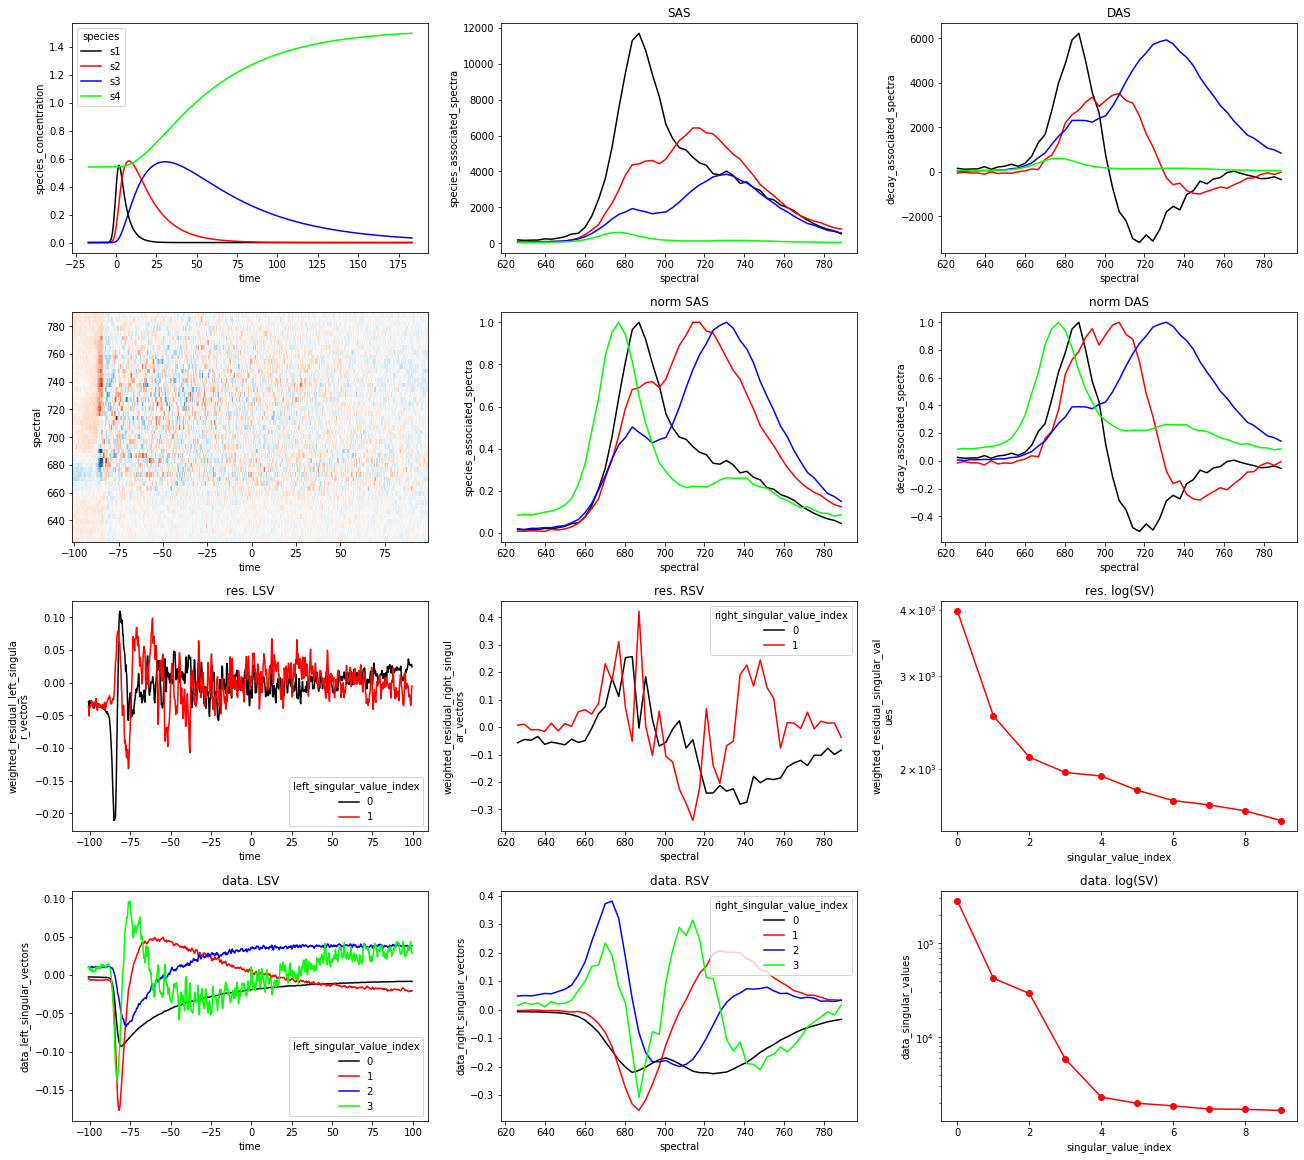

In [9]:
fig = plot_overview(global_result.data["dataset1"], linlog=False)

In [10]:
print_md(global_result.optimized_parameters)

  * __input__:

    |   _Label_ |   _Value_ |   _StdErr_ |   _Min_ |   _Max_ | _Vary_   | _Non-Negative_   | _Expr_   |
    |-----------|-----------|------------|---------|---------|----------|------------------|----------|
    |         1 |         1 |          0 |    -inf |     inf | False    | False            | None     |
    |         0 |         0 |          0 |    -inf |     inf | False    | False            | None     |

  * __irf__:

    | _Label_   |     _Value_ |    _StdErr_ |   _Min_ |   _Max_ | _Vary_   | _Non-Negative_   | _Expr_   |
    |-----------|-------------|-------------|---------|---------|----------|------------------|----------|
    | center    |   -83.8533  | 6.73391e-05 |    -inf |     inf | True     | False            | None     |
    | width     |     1.60986 | 6.95281e-05 |    -inf |     inf | True     | False            | None     |
    | backsweep | 13200       | 0           |    -inf |     inf | False    | False            | None     |

  * __kinetic__:

    |   _Label_ |     _Value_ |    _StdErr_ |   _Min_ |   _Max_ | _Vary_   | _Non-Negative_   | _Expr_   |
    |-----------|-------------|-------------|---------|---------|----------|------------------|----------|
    |         1 | 0.224983    | 3.32612e-05 |    -inf |     inf | True     | False            | None     |
    |         2 | 0.0680691   | 1.19792e-05 |    -inf |     inf | True     | False            | None     |
    |         3 | 0.0212251   | 1.18649e-06 |    -inf |     inf | True     | False            | None     |
    |         4 | 0.000159693 | 2.24382e-08 |    -inf |     inf | True     | False            | None     |



## Target analysis

Theoretical background from ``compartmental_models.pdf``

![model_sheme](target_scheme.jpg)


Concentration vector

$$c(t)= \begin{bmatrix} S(t) & B(t) & R_1(t) & R_2(t) & F(t)\end{bmatrix}^T$$

The concentration function correspond to

| ***Function name***    | ***S(t)***   | ***B(t)***   | ***R_1(t)***   | ***R_2(t)***   | ***F(t)***   |
|------------------------|--------------|--------------|----------------|----------------|--------------|
| **Name in the schema** | Soret        | Bulk         | Red1           | Red2           | Free         |


Differential equation

$$\dfrac{\mathrm{d}}{\mathrm{dt}}c(t) = \mathbf{K}c(t)+j(t)$$

Input function

$$j(t) = i(t) \begin{bmatrix} 1&0&0&0&0\end{bmatrix}^T$$

Transfer maxtrix $\mathbf{K}$

$$
\mathbf{K} = \begin{bmatrix} 
    -(k_{21} + k_{31} + k_{41} + k_{51}) &                          &                   &                  &       \\ 
    k_{21}                               & -(k_T + k_{32} + k_{42}) & k_{23}            & k_{24}           &       \\
    k_{31}                               &  k_{32}                  & -(k_{F} + k_{23}) &                  &       \\
    k_{41}                               &  k_{42}                  &                   & -(k_{F} + k_{24}) &      \\
    k_{51}                               &                          &                   &                  & k_{F} \\
    \end{bmatrix}
$$

- $k_T$: effective rate constantof Chl, T stands for photochemical Trapping of the excitation energy
- $k_F$: natural decay rate of free Chl, F stands for Fluorescence

In [11]:
# Just a little helper to quickly make a pretty table
from tabulate import tabulate

headers = list(
    map(
        lambda x: f"***{x}***",
        ["Function name", "S(t)", "B(t)", "R_1(t)", "R_2(t)", "F(t)"],
    )
)
print(
    tabulate(
        [["**Name in the schema**", "Soret", "Bulk", "Red1", "Red2", "Free"]],
        headers=headers,
        tablefmt="github",
    )
)

| ***Function name***    | ***S(t)***   | ***B(t)***   | ***R_1(t)***   | ***R_2(t)***   | ***F(t)***   |
|------------------------|--------------|--------------|----------------|----------------|--------------|
| **Name in the schema** | Soret        | Bulk         | Red1           | Red2           | Free         |


### Reduced K-matrix

$$
\mathbf{K} = \begin{bmatrix} 
           &        &        &        &       \\ 
    k_{21} & k_T    & k_{23} & k_{24} &       \\
    k_{31} & k_{32} & k_{F}  &        &       \\
    k_{41} & k_{42} &        & k_{F}  &       \\
    k_{51} &        &        &        & k_{F} \\
    \end{bmatrix}
$$

### Reduced K-matrix ignoring input to Red1 and Red2

$$
\mathbf{K} = \begin{bmatrix} 
           &        &        &        &       \\ 
    k_{21} & k_T    & k_{23} & k_{24} &       \\
           & k_{32} & k_{F}  &        &       \\
           & k_{42} &        & k_{F}  &       \\
    k_{51} &        &        &        & k_{F} \\
    \end{bmatrix}
$$

With the rate relations:

- $k_{23} = a_1~k_{32}$
- $k_{24} = a_2~k_{42}$

### target-model.yml

In [12]:
print_yaml_file("models/target-model.yml")

```yaml
type: kinetic-spectrum

megacomplex:
  mc1:
    k_matrix: [km1]

k_matrix:
  km1:
    matrix:
      (s2, s1): kinetic.1
      (s5, s1): kinetic.2
      (s2, s2): kinetic.3
      (s3, s2): kinetic.4
      (s4, s2): kinetic.5
#       (s2, s3): {expr:scaling.a1*kinetic.4}
#       (s2, s3): $scaling.1 * $kinetic.4
      (s2, s3): kinetic.7
      (s3, s3): kinetic.6
#       (s2, s4): {expr:scaling.a2*kinetic.5}
#       (s2, s4): $scaling.2 * $kinetic.5
      (s2, s4): kinetic.8
      (s4, s4): kinetic.6
      (s5, s5): kinetic.6
      
spectral_constraints:
  - type: zero
    compartment: s1
    interval:
      - [100, 1000]
  - type: zero
    compartment: s3
    interval:
      - [100, 680]
  - type: zero
    compartment: s4
    interval:
      - [100, 690]
      
      
irf:
  irf1:
    type: gaussian
    center: irf.center
    width: irf.width
    backsweep: True
    backsweep_period: irf.backsweep


initial_concentration:
  input1:
    compartments: [s1, s2, s3, s4, s5]
    parameters: [
      input.1,
      input.0,
      input.0,
      input.0,
      input.0]


dataset:
  dataset1:
    initial_concentration: input1
    megacomplex: [mc1]
    irf: irf1
```

### target-parameters.yml

In [13]:
print_yaml_file("models/target-parameters.yml")

```yaml
input:
  - ["1", 1]
  - ["0", 0]
  - {vary: false}

irf:
  - ["center", -84.0]
  - ["width", 1.6]
  - ["backsweep", 13800.0, {vary: false}]

kinetic:
  - [2, {vary: false}]
  - [0.1, {vary: false}]
  - 0.05
  - 0.1
  - 0.03
  - 0.00016
  - ["7", {expr: '$kinetic.4 * $scaling.1'}]
  - ["8", {expr: '$kinetic.5 * $scaling.2'}]
#   - {non-negative: true}
  
  
scaling:
  - [1.87, {vary: false}]
  - [1.37, {vary: false}]
```

In [14]:
target_model = load_model("models/target-model.yml")
target_parameters = load_parameters("models/target-parameters.yml")
print_md(target_model.validate(parameters=target_parameters))

Your model is valid.

In [15]:
print_md(target_model)

# Model

_Type_: kinetic-spectrum

## Initial Concentration

* **input1**:
  * *Label*: input1
  * *Compartments*: ['s1', 's2', 's3', 's4', 's5']
  * *Parameters*: [input.1, input.0, input.0, input.0, input.0]
  * *Exclude From Normalize*: []

## K Matrix

* **km1**:
  * *Label*: km1
  * *Matrix*: 
    * *('s2', 's1')*: kinetic.1
    * *('s5', 's1')*: kinetic.2
    * *('s2', 's2')*: kinetic.3
    * *('s3', 's2')*: kinetic.4
    * *('s4', 's2')*: kinetic.5
    * *('s2', 's3')*: kinetic.7
    * *('s3', 's3')*: kinetic.6
    * *('s2', 's4')*: kinetic.8
    * *('s4', 's4')*: kinetic.6
    * *('s5', 's5')*: kinetic.6
  

## Irf

* **irf1** (gaussian):
  * *Label*: irf1
  * *Type*: gaussian
  * *Center*: irf.center
  * *Width*: irf.width
  * *Normalize*: True
  * *Backsweep*: True
  * *Backsweep Period*: irf.backsweep

## Dataset

* **dataset1**:
  * *Label*: dataset1
  * *Megacomplex*: ['mc1']
  * *Initial Concentration*: input1
  * *Irf*: irf1

## Megacomplex

* **mc1**:
  * *Label*: mc1
  * *K Matrix*: ['km1']

## Spectral Constraints

* **zero**:
  * *Type*: zero
  * *Compartment*: s1
  * *Interval*: [[100, 1000]]
* **zero**:
  * *Type*: zero
  * *Compartment*: s3
  * *Interval*: [[100, 680]]
* **zero**:
  * *Type*: zero
  * *Compartment*: s4
  * *Interval*: [[100, 690]]



### Create scheme and optimize it

In [16]:
target_scheme = Scheme(
    target_model,
    target_parameters,
    {"dataset1": dataset},
    non_negative_least_squares=True,
)
target_result = optimize(target_scheme)

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.3863e+08                                    1.20e+11    
       1              2         4.8613e+07      9.00e+07       2.65e-01       2.49e+10    
       2              3         4.6291e+07      2.32e+06       2.78e-02       5.90e+09    
       3              4         4.6058e+07      2.33e+05       1.30e-02       2.13e+09    
       4              5         4.6049e+07      8.58e+03       2.76e-03       2.53e+08    
       5              6         4.6049e+07      5.01e+02       7.49e-04       1.09e+08    
       6              7         4.6049e+07      3.21e+01       1.90e-04       2.18e+07    
       7              8         4.6049e+07      2.07e+00       5.00e-05       6.48e+06    
       8              9         4.6049e+07      1.34e-01       1.26e-05       1.52e+06    
`ftol` termination condition is satisfied.
Function evaluations 9, initial cost 1.3863e+08

In [17]:
target_result.data["dataset1"]

<xarray.Dataset>
Dimensions:                                   (clp_label: 5, component: 5, from_species: 5, left_singular_value_index: 49, right_singular_value_index: 49, singular_value_index: 49, species: 5, spectral: 49, time: 923, to_species: 5)
Coordinates:
  * time                                      (time) float64 -101.0 ... 99.46
  * spectral                                  (spectral) float64 626.1 ... 788.7
  * clp_label                                 (clp_label) <U2 's1' 's2' ... 's5'
  * species                                   (species) <U2 's1' 's2' ... 's5'
    rate                                      (component) float64 -2.1 ... -0...
    lifetime                                  (component) float64 -0.4762 ......
  * to_species                                (to_species) <U2 's1' ... 's5'
  * from_species                              (from_species) <U2 's1' ... 's5'
Dimensions without coordinates: component, left_singular_value_index, right_singular_value_index, singular_value_index
Data variables: (12/24)
    data                                      (time, spectral) float64 50.75 ...
    data_left_singular_vectors                (time, left_singular_value_index) float64 ...
    data_singular_values                      (singular_value_index) float64 ...
    data_right_singular_vectors               (right_singular_value_index, spectral) float64 ...
    matrix                                    (spectral, time, clp_label) float64 ...
    clp                                       (spectral, clp_label) float64 0...
    ...                                        ...
    a_matrix                                  (component, species) float64 1....
    k_matrix                                  (to_species, from_species) float64 ...
    k_matrix_reduced                          (to_species, from_species) float64 ...
    irf_center                                float64 -84.26
    irf_width                                 float64 1.602
    irf                                       (time) float64 2.23e-24 ... 0.0
Attributes:
    root_mean_square_error:           45.125714328556704
    weighted_root_mean_square_error:  45.125714328556704

### Result plots

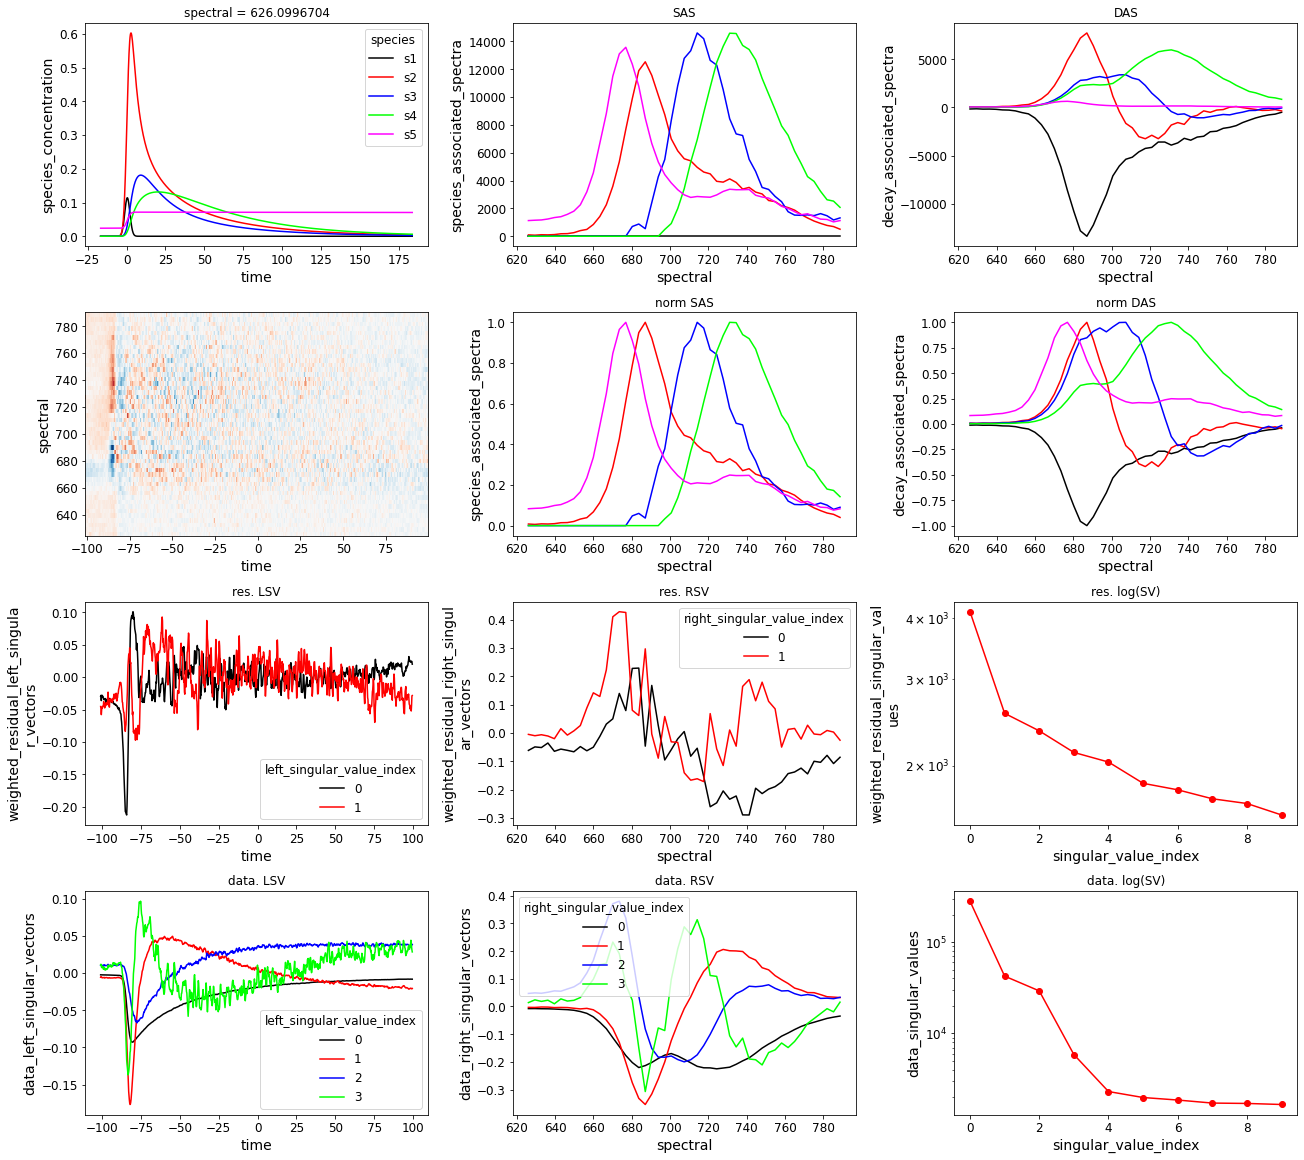

In [18]:
fig = plot_overview(target_result.data["dataset1"], linlog=False)

In [19]:
print_md(target_result.optimized_parameters)

  * __input__:

    |   _Label_ |   _Value_ |   _StdErr_ |   _Min_ |   _Max_ | _Vary_   | _Non-Negative_   | _Expr_   |
    |-----------|-----------|------------|---------|---------|----------|------------------|----------|
    |         1 |         1 |          0 |    -inf |     inf | False    | False            | None     |
    |         0 |         0 |          0 |    -inf |     inf | False    | False            | None     |

  * __irf__:

    | _Label_   |     _Value_ |    _StdErr_ |   _Min_ |   _Max_ | _Vary_   | _Non-Negative_   | _Expr_   |
    |-----------|-------------|-------------|---------|---------|----------|------------------|----------|
    | center    |   -84.2618  | 6.00839e-05 |    -inf |     inf | True     | False            | None     |
    | width     |     1.60168 | 6.52861e-05 |    -inf |     inf | True     | False            | None     |
    | backsweep | 13800       | 0           |    -inf |     inf | False    | False            | None     |

  * __kinetic__:

    |   _Label_ |     _Value_ |    _StdErr_ |   _Min_ |   _Max_ | _Vary_   | _Non-Negative_   | _Expr_                  |
    |-----------|-------------|-------------|---------|---------|----------|------------------|-------------------------|
    |         1 | 2           | 0           |    -inf |     inf | False    | False            | None                    |
    |         2 | 0.1         | 0           |    -inf |     inf | False    | False            | None                    |
    |         3 | 0.0680715   | 3.36631e-06 |    -inf |     inf | True     | False            | None                    |
    |         4 | 0.072446    | 1.19977e-05 |    -inf |     inf | True     | False            | None                    |
    |         5 | 0.0281201   | 2.88594e-06 |    -inf |     inf | True     | False            | None                    |
    |         6 | 0.000159065 | 2.17346e-08 |    -inf |     inf | True     | False            | None                    |
    |         7 | 0.135474    | 0           |    -inf |     inf | False    | False            | $kinetic.4 * $scaling.1 |
    |         8 | 0.0385246   | 0           |    -inf |     inf | False    | False            | $kinetic.5 * $scaling.2 |

  * __scaling__:

    |   _Label_ |   _Value_ |   _StdErr_ |   _Min_ |   _Max_ | _Vary_   | _Non-Negative_   | _Expr_   |
    |-----------|-----------|------------|---------|---------|----------|------------------|----------|
    |         1 |      1.87 |          0 |    -inf |     inf | False    | False            | None     |
    |         2 |      1.37 |          0 |    -inf |     inf | False    | False            | None     |

